# The Regresson Project

## Business Understanding

## Background

#### This project centres on time series forecasting to predict store sales for Corporation Favorita, a major Ecuadorian-based grocery retailer. The aim is to develop a model that accurately forecasts the unit sales of thousands of items across various Favorita stores.

## Scenario

#### As the team lead for data science at Corporation Favorita, a large Ecuadorian-based grocery retailer, my goal is to ensure that we always have the right quantity of products in stock. To achieve this, we have decided to build a series of machine learning models to forecast the demand for products in various locations. The marketing and sales team have provided us with some data to aid in this endeavour. Our team uses the CRISP-DM Framework for our Data Science projects.

## Objective

### This project will focus on two key areas.

#### *Understanding the Data:* The first objective is to gain insights into the store sales data, including store-specific information, product families, promotions, and sales numbers. This understanding will enable the company to make informed business decisions.

#### *Predicting Store Sales:* The goal is to develop a reliable time series forecasting model that accurately predicts the unit sales for different product families at various Favorita stores. This will help the company optimize inventory management, plan promotions, and improve overall sales performance.

## Methodology 

#### *Data Exploration:* Our team will begin with a thorough exploration of the data. This involves examining the dataset to understand its structure, identifying missing values, and assessing the overall quality of the data. We will perform descriptive statistics to summarise the main features of the data and use visualisation techniques to uncover patterns and trends. By understanding the relationships between different variables, such as store-specific information, product families, promotions, and sales numbers, we will be able to identify key factors that influence sales.

#### *Data Preparation:* Once we have a good grasp of the data, we will move on to the data preparation phase. This step includes cleaning the data by handling missing values, outliers, and any inconsistencies. We will also perform feature engineering to create new variables that can enhance the model's predictive power. For instance, we might create features that capture seasonality, promotional effects, and store-specific trends. The data will be split into training and testing sets to validate our models effectively.

#### *Time Series Analysis:* With the prepared data, we will conduct a time series analysis to model and forecast sales. We will evaluate each model's performance using appropriate metrics and cross-validation techniques to ensure robustness. The chosen model will be fine-tuned to optimise its accuracy in predicting unit sales for various product families across different Favorita stores. This forecasting model will then be used to help the company optimise inventory management, plan promotions, and improve overall sales performance.

## Additional Notes

#### **1.** Wages in the public sector are paid every two weeks on the 15th and on the last day of the month. Supermarket sales could be affected by this.

#### **2.** A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

## Hypothesis

 **`Null Hypothesis`**

#### There is no significant relationship between the date and the sales figures in the dataset.

**` Alternative Hypothesis `**

#### There is a significant relationship between the date and the sales figures in the dataset.

## Analytical Questions

#### **1.** `Is the train dataset complete (has all the required dates)?`

#### **2.** `Which dates have the lowest and highest sales for each year (excluding days the store was closed)?`

#### **3.** `Compare the sales for each month across the years and determine which month of which year had the highest sales.`


#### **4.** `Did the earthquake impact sales?`

#### **5.** `Are certain stores or groups of stores selling more products? (Cluster, city, state, type)`

#### **6.** `Are sales affected by promotions, oil prices and holidays?`

#### **7.** `What analysis can we get from the date and its extractable features?`


#### **8.** `Which product family and stores did the promotions affect.`


#### **9.** `What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)`


#### **10.** `Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.`

## Business Questions

**1** ` How do sales trends vary over different seasons of the year?`

**2** ` What is the impact of promotions on the sales of different product families?`

**3** ` Are there significant differences in sales performance across different store clusters?`

**4** ` How do external factors, such as oil prices (dcoilwtico), affect sales trends?`

**5** ` What is the effect of holiday periods or special events on sales volumes? `

## Data Understandng

### Data Collection

#### The task involves accessing three distinct datasets from different sources: a database, OneDrive, and a GitHub repository. Each dataset requires a specific access method. For the database, we will query using an ODBC or ORM library. For OneDrive, we will download the file programmatically using the requests library. For the GitHub repository, we will either clone or download the file using GitPython or the requests library.

### `Importation`

In [297]:
# Importing necessary libraries
from dotenv import dotenv_values
import pyodbc
import requests
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy.stats import ttest_ind
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import random
import joblib
import warnings

# Suppressing all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

# Set display options for Pandas DataFrame
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)


### ` Data Loading `


In [210]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("user")
password = environment_variables.get("password")

In [211]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [212]:
# Use the pyodbc library to pass in the connection string.

connection = pyodbc.connect(connection_string)

In [213]:
# Accessing the data from the database
query = "SELECT * FROM dbo.oil"

In [214]:
# Viewing the table in the database 
train_1 = pd.read_sql(query, connection)
train_1

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997
...,...,...
1213,2017-08-25,47.650002
1214,2017-08-28,46.400002
1215,2017-08-29,46.459999
1216,2017-08-30,45.959999


In [215]:
# Accessing the data from the database 
query ="SELECT * FROM dbo.holidays_events"

In [216]:
# Viewing the table in the database 
train_2 = pd.read_sql(query, connection)
train_2

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [217]:
# Accessing the data from the database 
query ="SELECT * FROM dbo.stores"

In [218]:
# Viewing the table in the database 
train_3 = pd.read_sql(query, connection)
train_3

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [219]:
# Close the database connection
connection.close()

In [220]:
# Read the remaining dataset in the csv file
train_4 = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\The_Regression_Project\Project_data\train.csv")
train_4

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [221]:
# Read the remaining dataset in the csv file
train_5 = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\The_Regression_Project\Project_data\transactions.csv")
train_5

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [222]:
# Read the remaining dataset in the csv file
train_6 = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\The_Regression_Project\Project_data\test.csv")
train_6

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [223]:
# Read the remaining dataset in the csv file
train_7 = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\The_Regression_Project\Project_data\test.csv")
train_7 

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


`Merge Data`

In [224]:
# # Concatenate all the DataFrames
# train_data = pd.concat([train_1, train_2, train_3, train_4, train_5], ignore_index=True)

# # Save the concatenated DataFrame to a CSV file
# train_data.to_csv("train_data.csv", index=False)

# train_data.to_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\The_Regression_Project\Dataset\train_data.csv", index=False)

## Exploratory Data Analysis: EDA

In [225]:
# Check the datatypes and number of columns
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [226]:
# Check the datatypes and number of columns

train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [227]:
# Check the datatypes and number of columns

train_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [228]:
#  check the datatypes and number of columns

train_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [229]:
# Check the datatypes and number of columns

train_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [230]:
# check the datatypes and number of columns

train_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [231]:
# Check the datatypes and number of columns 

train_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [232]:
#  Change the datatype of the "date" column

train_1['date'] = pd.to_datetime(train_1['date'])
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [233]:
# Change the datatypes of the "date" column

train_2['date'] = pd.to_datetime(train_2['date'])
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [234]:
#  Change the datatype for the "date" column 

train_4['date'] = pd.to_datetime(train_4['date'])
train_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [235]:
# Change the datatype of the "date" column

train_5['date'] = pd.to_datetime(train_5['date'])
train_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [236]:
# Change the datatype of the "date" column

train_7['date'] = pd.to_datetime(train_7['date'])
train_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [237]:
# Create a copy of the original Dataframe to preserve the orginal data

train_4_copy = train_4.copy()

# Break the date column into day, month, week, year

train_4_copy['day'] = train_4_copy['date'].dt.day
train_4_copy['month'] = train_4_copy['date'].dt.month
train_4_copy['week'] = train_4_copy['date'].dt.isocalendar().week.astype(int)
train_4_copy['year'] = train_4_copy['date'].dt.year

In [238]:
# Create a dictionary of the dataframes to process
dataframes = {
    "train_1": train_1,
    "train_2": train_2,
    "train_3": train_3,
    "train_5": train_5,
    "train_6": train_6,
    "train_7": train_7,
    "train_4_copy": train_4_copy,
    }

# Loop through each dataframe in the dictionary
for name, tr in dataframes.items():
    # Determine the proportion of missing values
    missing_percentage = (tr.isnull().mean() * 100).round(2)

    # Check for duplicated values
    duplicate_num = tr.duplicated(subset=None, keep=False).sum()

    # Display duplicated rows if any
    duplicated_rows = tr[tr.duplicated(subset=None, keep=False)]

    # Display Results
    print(f"Proportion of missing values in {name} dataset:")
    print(missing_percentage)
    print(f"\nNumber of duplicated rows in {name} dataset: {duplicate_num}")
    if duplicate_num > 0:
        print(f"\nDuplicated rows in the {name} dataset:")
        print(duplicated_rows)
    print("\n" + "-"*50 + "\n")

Proportion of missing values in train_1 dataset:
date          0.00
dcoilwtico    3.53
dtype: float64

Number of duplicated rows in train_1 dataset: 0

--------------------------------------------------

Proportion of missing values in train_2 dataset:
date           0.0
type           0.0
locale         0.0
locale_name    0.0
description    0.0
transferred    0.0
dtype: float64

Number of duplicated rows in train_2 dataset: 0

--------------------------------------------------

Proportion of missing values in train_3 dataset:
store_nbr    0.0
city         0.0
state        0.0
type         0.0
cluster      0.0
dtype: float64

Number of duplicated rows in train_3 dataset: 0

--------------------------------------------------

Proportion of missing values in train_5 dataset:
date            0.0
store_nbr       0.0
transactions    0.0
dtype: float64

Number of duplicated rows in train_5 dataset: 0

--------------------------------------------------

Proportion of missing values in train_6

In [252]:
# View columns in train_4_copy

train_4_copy.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'day',
       'month', 'week', 'year'],
      dtype='object')

In [254]:
# Display unique values of train_4_copy

train_4_copy.nunique()

# List the unique values in each column

for column in train_4_copy.columns:
    print(f'{column}: {train_4_copy[column].unique()}')


id: [      0       1       2 ... 3000885 3000886 3000887]
date: <DatetimeArray>
['2013-01-01 00:00:00', '2013-01-02 00:00:00', '2013-01-03 00:00:00',
 '2013-01-04 00:00:00', '2013-01-05 00:00:00', '2013-01-06 00:00:00',
 '2013-01-07 00:00:00', '2013-01-08 00:00:00', '2013-01-09 00:00:00',
 '2013-01-10 00:00:00',
 ...
 '2017-08-06 00:00:00', '2017-08-07 00:00:00', '2017-08-08 00:00:00',
 '2017-08-09 00:00:00', '2017-08-10 00:00:00', '2017-08-11 00:00:00',
 '2017-08-12 00:00:00', '2017-08-13 00:00:00', '2017-08-14 00:00:00',
 '2017-08-15 00:00:00']
Length: 1684, dtype: datetime64[ns]
store_nbr: [ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52
 53 54  6  7  8  9]
family: ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIA

In [255]:
# Describe the numeric columns of the train_4_copy

train_4_copy.describe().T

,count,mean,min,25%,50%,75%,max,std
id,3000888.0,1500443.5,0.0,750221.75,1500443.5,2250665.25,3000887.0,866281.891642
date,3000888,2015-04-24 08:27:04.703088384,2013-01-01 00:00:00,2014-02-26 18:00:00,2015-04-24 12:00:00,2016-06-19 06:00:00,2017-08-15 00:00:00,NaN
store_nbr,3000888.0,27.5,1.0,14.0,27.5,41.0,54.0,15.585787
sales,3000888.0,357.775749,0.0,0.0,11.0,195.84725,124717.0,1101.997721
onpromotion,3000888.0,2.60277,0.0,0.0,0.0,0.0,741.0,12.218882
day,3000888.0,15.630048,1.0,8.0,16.0,23.0,31.0,8.794789
month,3000888.0,6.207838,1.0,3.0,6.0,9.0,12.0,3.385668
week,3000888.0,25.242874,1.0,13.0,25.0,38.0,53.0,14.794671
year,3000888.0,2014.837886,2013.0,2014.0,2015.0,2016.0,2017.0,1.345518


In [256]:
# Describe the train_4_copy data including objects

train_4_copy.describe(include='object').T

,count,unique,top,freq
family,3000888,33,AUTOMOTIVE,90936


### Visualizing Holidays and Events

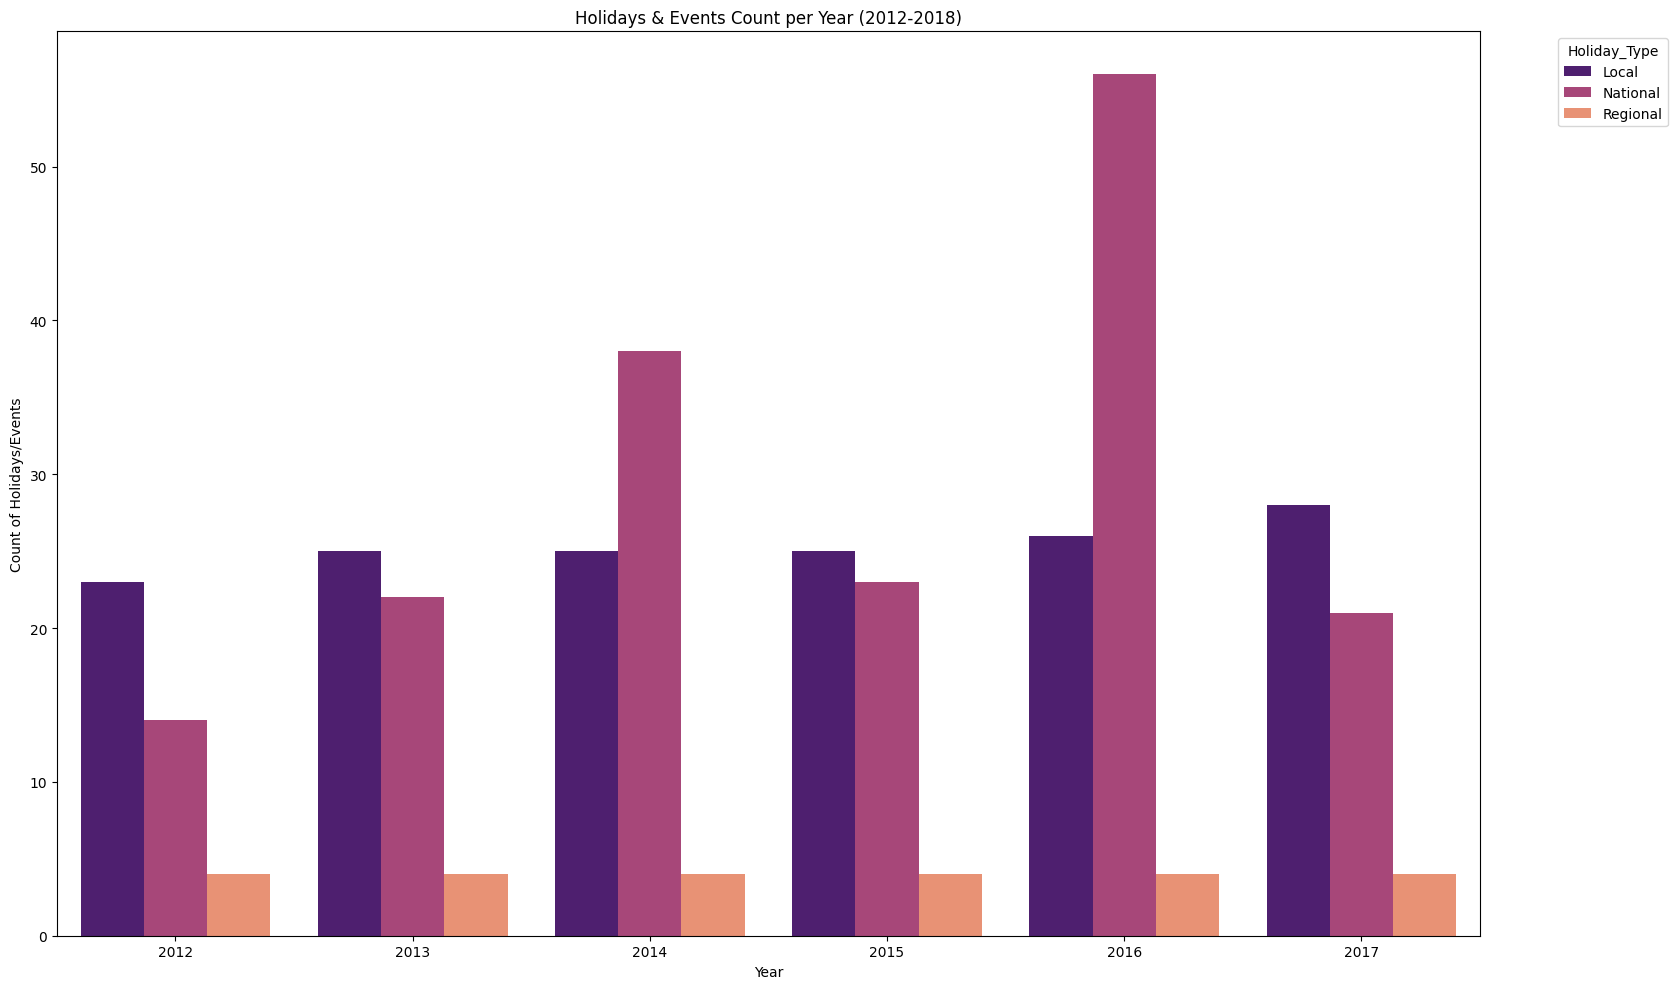

In [271]:
# Convert 'date' to datetime format if not already done
train_2['date'] = pd.to_datetime(train_2['date'])

# Extract the year from the date
train_2['year'] = train_2['date'].dt.year

# Count the number of holidays/events per year per locale
train_2_count = train_2.groupby(['year', 'locale']).size().reset_index(name='counts')

plt.figure(figsize=(15, 10))
sns.barplot(data=train_2_count, x='year', y='counts', hue='locale', palette='magma')
plt.title('Holidays & Events Count per Year (2012-2018)')
plt.xlabel('Year')
plt.ylabel('Count of Holidays/Events')
plt.grid(False)
plt.tight_layout()
plt.legend(title='Holiday_Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Yearly Trends:

The plot shows how the number of holidays and events has changed over the years from 2012 to 2017. By examining the heights of the bars, we can identify which years had more or fewer holidays/events.
** **
Holiday_Type Differences:

The different colors in the bars represent different locales. This allows us to see how the distribution of holidays/events varies across different regions or locations.
** **
Business Implications:

Understanding the distribution of holidays and events can help in planning marketing campaigns, inventory management, and staffing. For instance, if certain years or Holiday_Types have consistently high numbers, businesses can prepare for increased demand during those periods.
This visualisation provides valuable insights into the distribution of holidays and events, which can inform strategic decision-making for business operations and marketing efforts.



### Insights pertaining to stores

In [274]:
# The number of unique stores in train_3

train_3['store_nbr'].nunique()

54

In [275]:
# The number of cities the stores are located 

train_3['city'].nunique()

22

In [276]:
# The number of unique states the stores are located

train_3['state'].nunique()

16

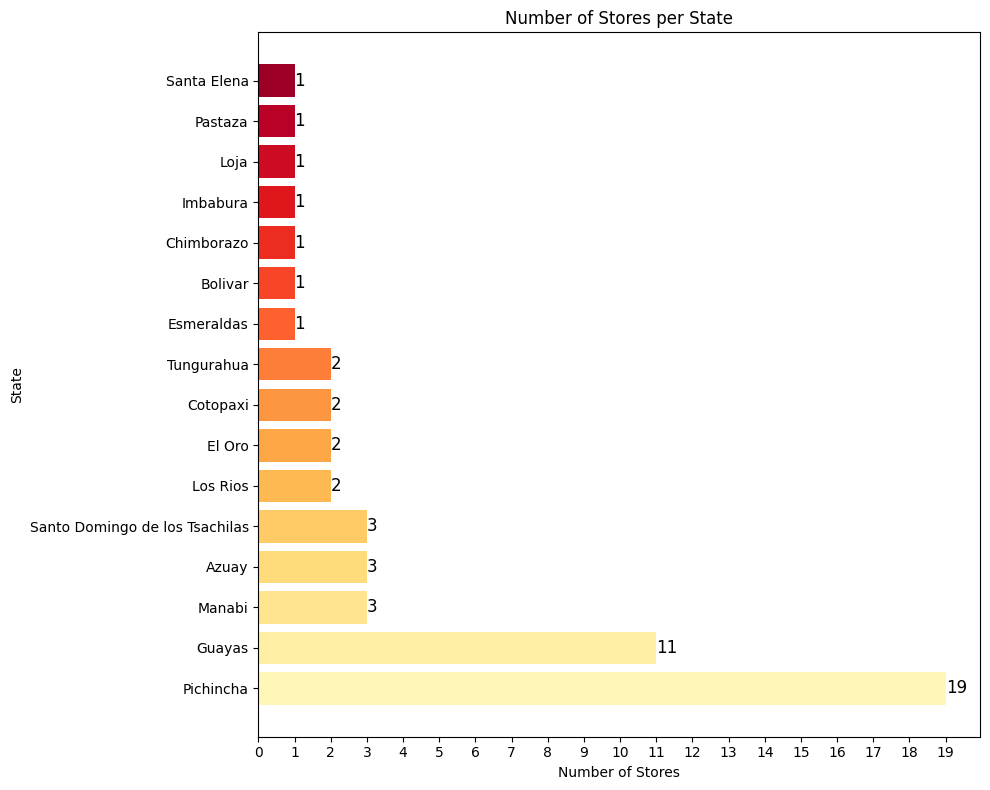

,state,store_nbr
0,Pichincha,19
1,Guayas,11
2,Manabi,3
3,Azuay,3
4,Santo Domingo de los Tsachilas,3
5,Los Rios,2
6,El Oro,2
7,Cotopaxi,2
8,Tungurahua,2
9,Esmeraldas,1


In [295]:
# Count the unique number of stores in each state
store_count = train_3.groupby('state').store_nbr.nunique().sort_values(ascending=False).reset_index()

# Plotting a horizontal bar chart to visualize the number of stores per state
plt.figure(figsize=(10, 8))
bars = plt.barh(store_count['state'], store_count['store_nbr'], color=sns.color_palette('YlOrRd', n_colors=len(store_count)))

# Adding data labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=12, color='black')

max_stores = store_count['store_nbr'].max()
plt.xticks(list(range(0, max_stores + 1)))
plt.title('Number of Stores per State')
plt.xlabel('Number of Stores')
plt.ylabel('State')
plt.grid(False)  # Turn off grid
plt.tight_layout()
plt.show()

# Display store count per state
store_count


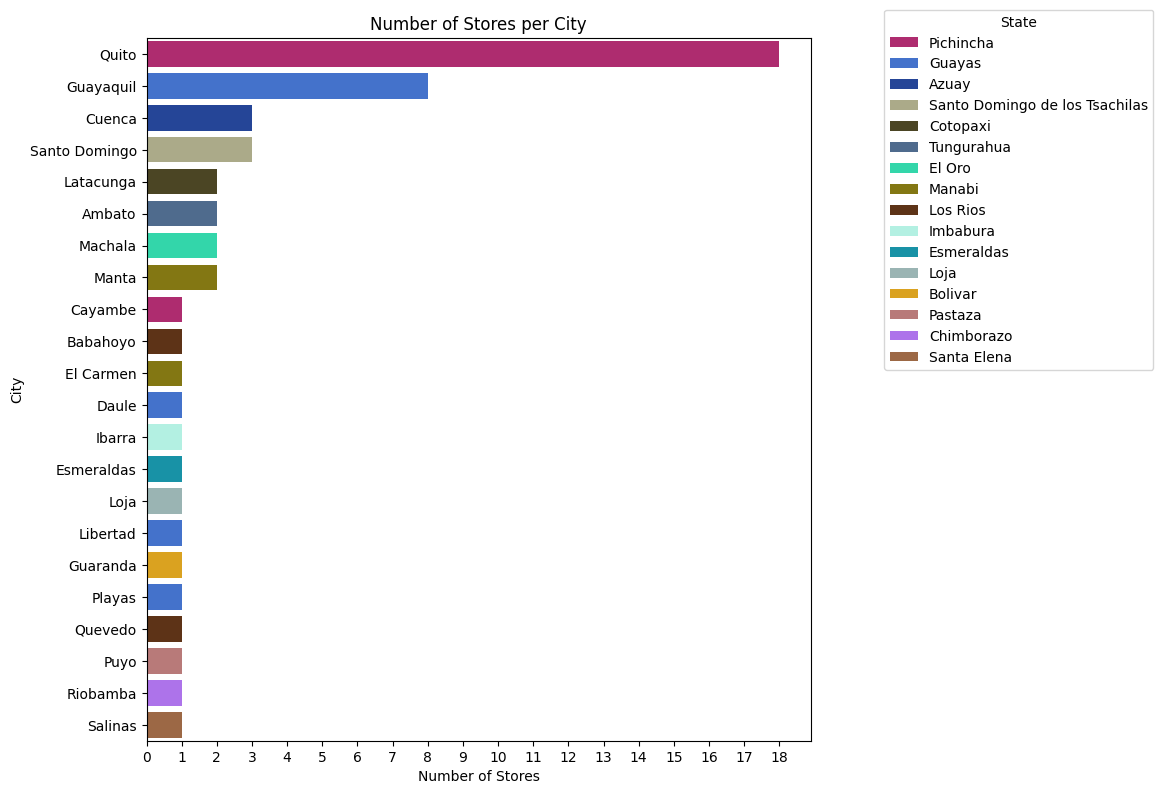

,city,state,store_nbr
0,Quito,Pichincha,18
1,Guayaquil,Guayas,8
2,Cuenca,Azuay,3
3,Santo Domingo,Santo Domingo de los Tsachilas,3
4,Latacunga,Cotopaxi,2
5,Ambato,Tungurahua,2
6,Machala,El Oro,2
7,Manta,Manabi,2
8,Cayambe,Pichincha,1
9,Babahoyo,Los Rios,1


In [298]:
# Count the unique number of stores in each city with state as hue
store_count = train_3.groupby(['city', 'state']).store_nbr.nunique().sort_values(ascending=False).reset_index()

# Generate random colors for each unique state
unique_states = store_count['state'].unique()
random_colors = {state: f'#{random.randint(0, 0xFFFFFF):06x}' for state in unique_states}

# Plotting the unique number of stores for each city with hue as 'state'
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=store_count, y='city', x='store_nbr', hue='state', palette=random_colors, dodge=False, orient='h')

# Adding data labels to each bar
for p in ax.patches:
    if p.get_width() > 0:
        ax.annotate(format(p.get_width(), '.0f'), 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', 
                    xytext=(10, 0), 
                    textcoords='offset points',
                    color='white')

# Setting whole number units for x-axis ticks
max_stores = store_count['store_nbr'].max()
plt.xticks(list(range(0, max_stores + 1)))

plt.title('Number of Stores per City')
plt.xlabel('Number of Stores')
plt.ylabel('City')

# Move legend to the top right corner
plt.legend(title='State', bbox_to_anchor=(1.1, 1.05), loc='upper left')

plt.grid(False)  # Turn off grid lines
plt.tight_layout()
plt.show()

# Display store count per city
store_count


In [239]:
# Read the merged data 
# train_data.sample(22)

`Univariate Analysis`
Here is the section to explore, analyze, visualize each variable independently of the others.

In [240]:
# find unique values in each column of the dataset

for column in train_data.columns:
    print(f'{column}: {train_data[column].nunique()} unique values')


date: 1755 unique values
dcoilwtico: 998 unique values
type: 11 unique values
locale: 3 unique values
locale_name: 24 unique values
description: 103 unique values
transferred: 2 unique values
store_nbr: 54 unique values
city: 22 unique values
state: 16 unique values
cluster: 17 unique values
id: 3000888 unique values
family: 33 unique values
sales: 379610 unique values
onpromotion: 362 unique values
transactions: 4993 unique values


In [241]:
# Descriptive statistics for  sales
pd.DataFrame(train_data['sales'].describe())

,sales
count,3.000888e+06
mean,3.577757e+02
std,1.101998e+03
min,0.000000e+00
25%,0.000000e+00
50%,1.100000e+01
75%,1.958473e+02
max,1.247170e+05


In [242]:
#  Describe the numeric columns

In [243]:
# Descriptive statistics on the family column 
pd.DataFrame(train_data['family'].value_counts())

,count
family,
AUTOMOTIVE,90936
BABY CARE,90936
BEAUTY,90936
BEVERAGES,90936
BOOKS,90936
BREAD/BAKERY,90936
CELEBRATION,90936
CLEANING,90936
DAIRY,90936


<Axes: >

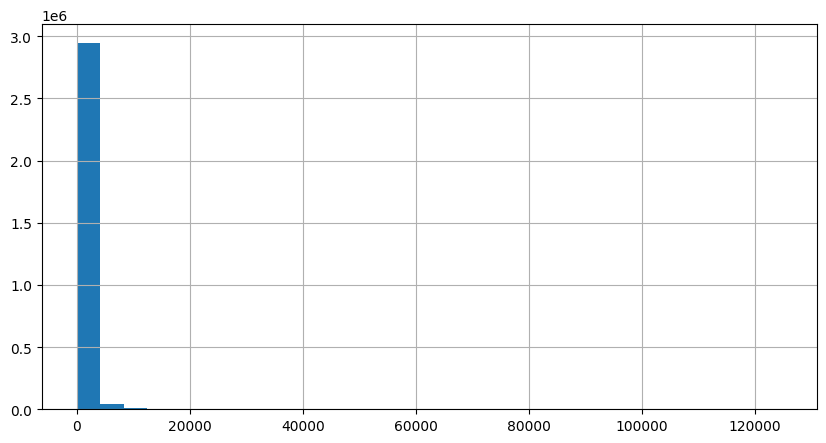

In [244]:
# plot histogram for the sales column

train_data['sales'].hist(bins=30, figsize=(10,5))

<Axes: >

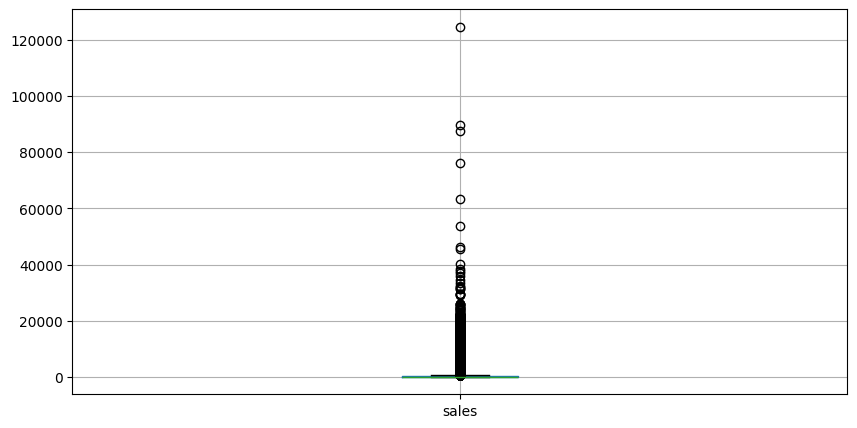

In [245]:
#  plot box plots for sales column

train_data.boxplot(column='sales', figsize=(10,5))

In [246]:
# plot KDE plot for the sales column

sns.kdeplot(train_data['sales'], shade=True)

KeyboardInterrupt: 

<Axes: xlabel='family', ylabel='sales'>

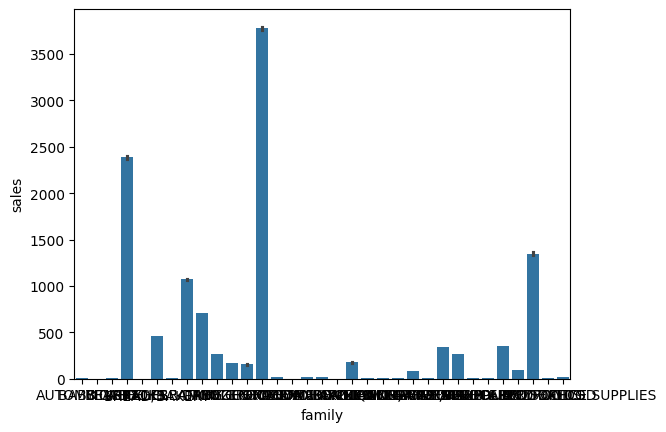

In [ ]:
# Visualize dcoilwtico as bar plot

sns.barplot(x='family', y='sales', data=train_data)

<Axes: xlabel='dcoilwtico', ylabel='Density'>

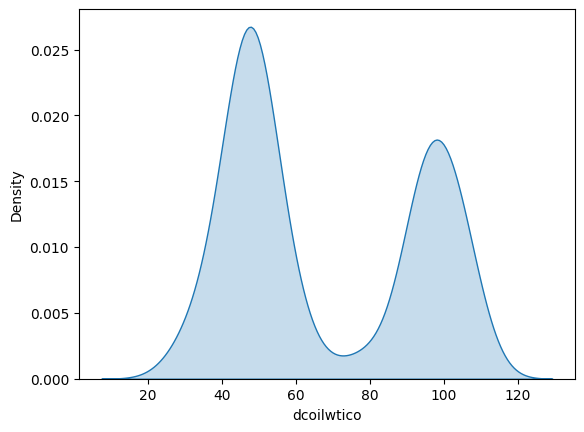

In [ ]:
# Visualize KDE plot for dcoilwtico

sns.kdeplot(train_data['dcoilwtico'], shade=True)

<Axes: xlabel='store_nbr', ylabel='Density'>

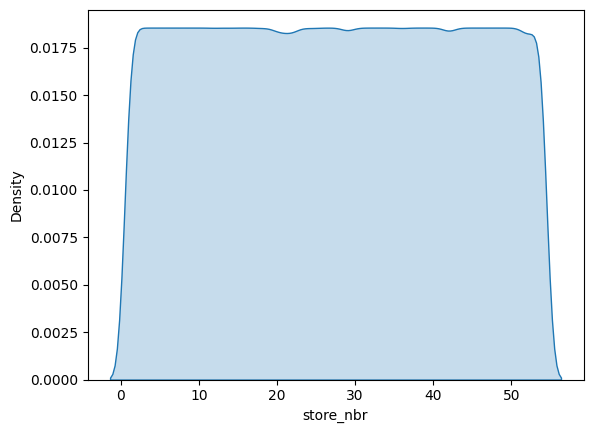

In [ ]:
# plot KDE plot for store_nbr 

sns.kdeplot(train_data['store_nbr'], shade=True)


<Axes: xlabel='cluster', ylabel='count'>

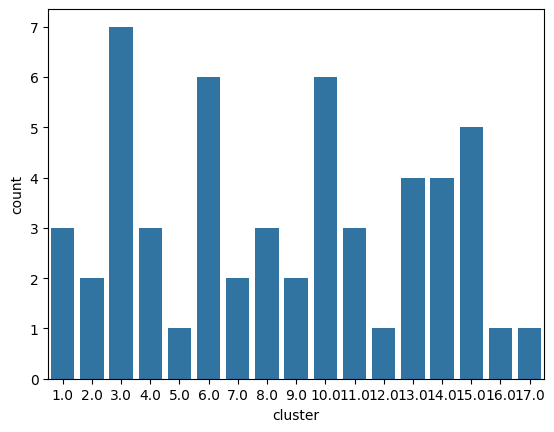

In [ ]:
# Visualize cluster

sns.countplot(x='cluster', data=train_data)

<Axes: xlabel='cluster', ylabel='Density'>

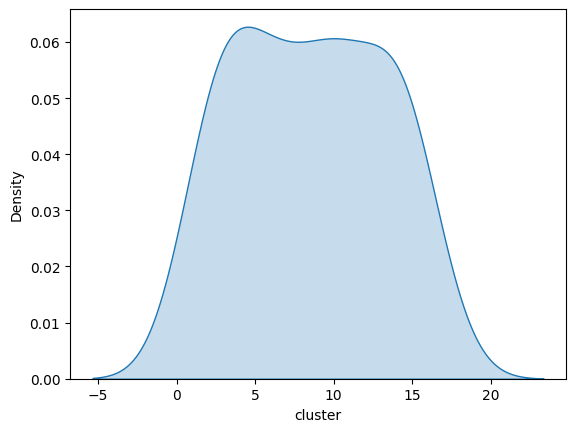

In [ ]:
#  view cluster as KDE plot

sns.kdeplot(train_data['cluster'], shade=True)

<Axes: xlabel='id', ylabel='Density'>

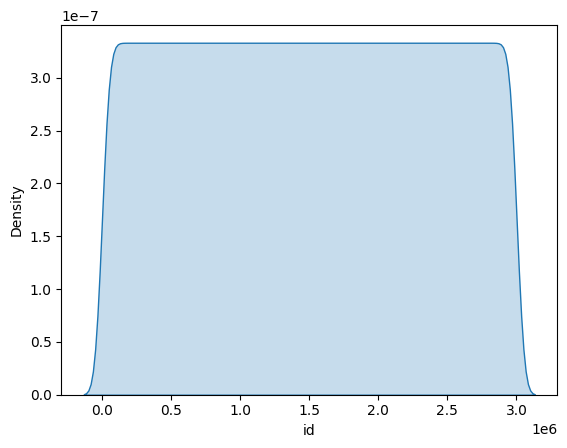

In [ ]:
# Use KDE plot to visualize id

sns.kdeplot(train_data['id'], shade=True)

<Axes: xlabel='onpromotion', ylabel='Density'>

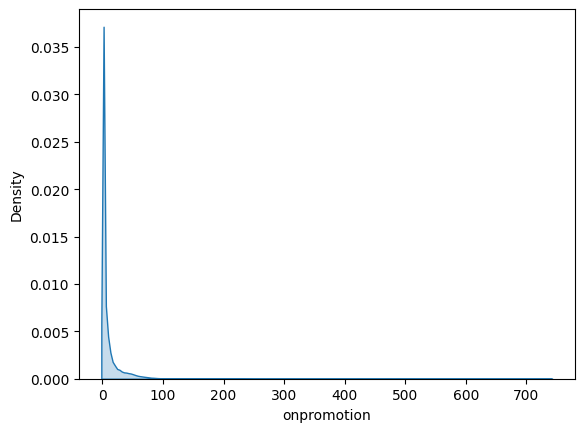

In [ ]:
# visualize onpromotion with KDE plot

sns.kdeplot(train_data['onpromotion'], shade=True)


`Bivariate & Multivariate Analysis`
Here is the section to explore, analyze, visualize each variable in relation to the others.

In [ ]:
# Describe the numerical values of the dataset 

train_data.describe()

,dcoilwtico,store_nbr,cluster,id,sales,onpromotion,transactions
count,1175.000000,3.084430e+06,54.000000,3.000888e+06,3.000888e+06,3.000888e+06,83488.000000
mean,67.714366,2.748482e+01,8.481481,1.500444e+06,3.577757e+02,2.602770e+00,1694.602158
std,25.630476,1.558666e+01,4.693395,8.662819e+05,1.101998e+03,1.221888e+01,963.286644
min,26.190001,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.000000
25%,46.405001,1.400000e+01,4.000000,7.502218e+05,0.000000e+00,0.000000e+00,1046.000000
50%,53.189999,2.700000e+01,8.500000,1.500444e+06,1.100000e+01,0.000000e+00,1393.000000
75%,95.660000,4.100000e+01,13.000000,2.250665e+06,1.958473e+02,0.000000e+00,2079.000000
max,110.620003,5.400000e+01,17.000000,3.000887e+06,1.247170e+05,7.410000e+02,8359.000000


array([[<Axes: title={'center': 'dcoilwtico'}>,
        <Axes: title={'center': 'store_nbr'}>,
        <Axes: title={'center': 'cluster'}>],
       [<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'sales'}>,
        <Axes: title={'center': 'onpromotion'}>],
       [<Axes: title={'center': 'transactions'}>, <Axes: >, <Axes: >]],
      dtype=object)

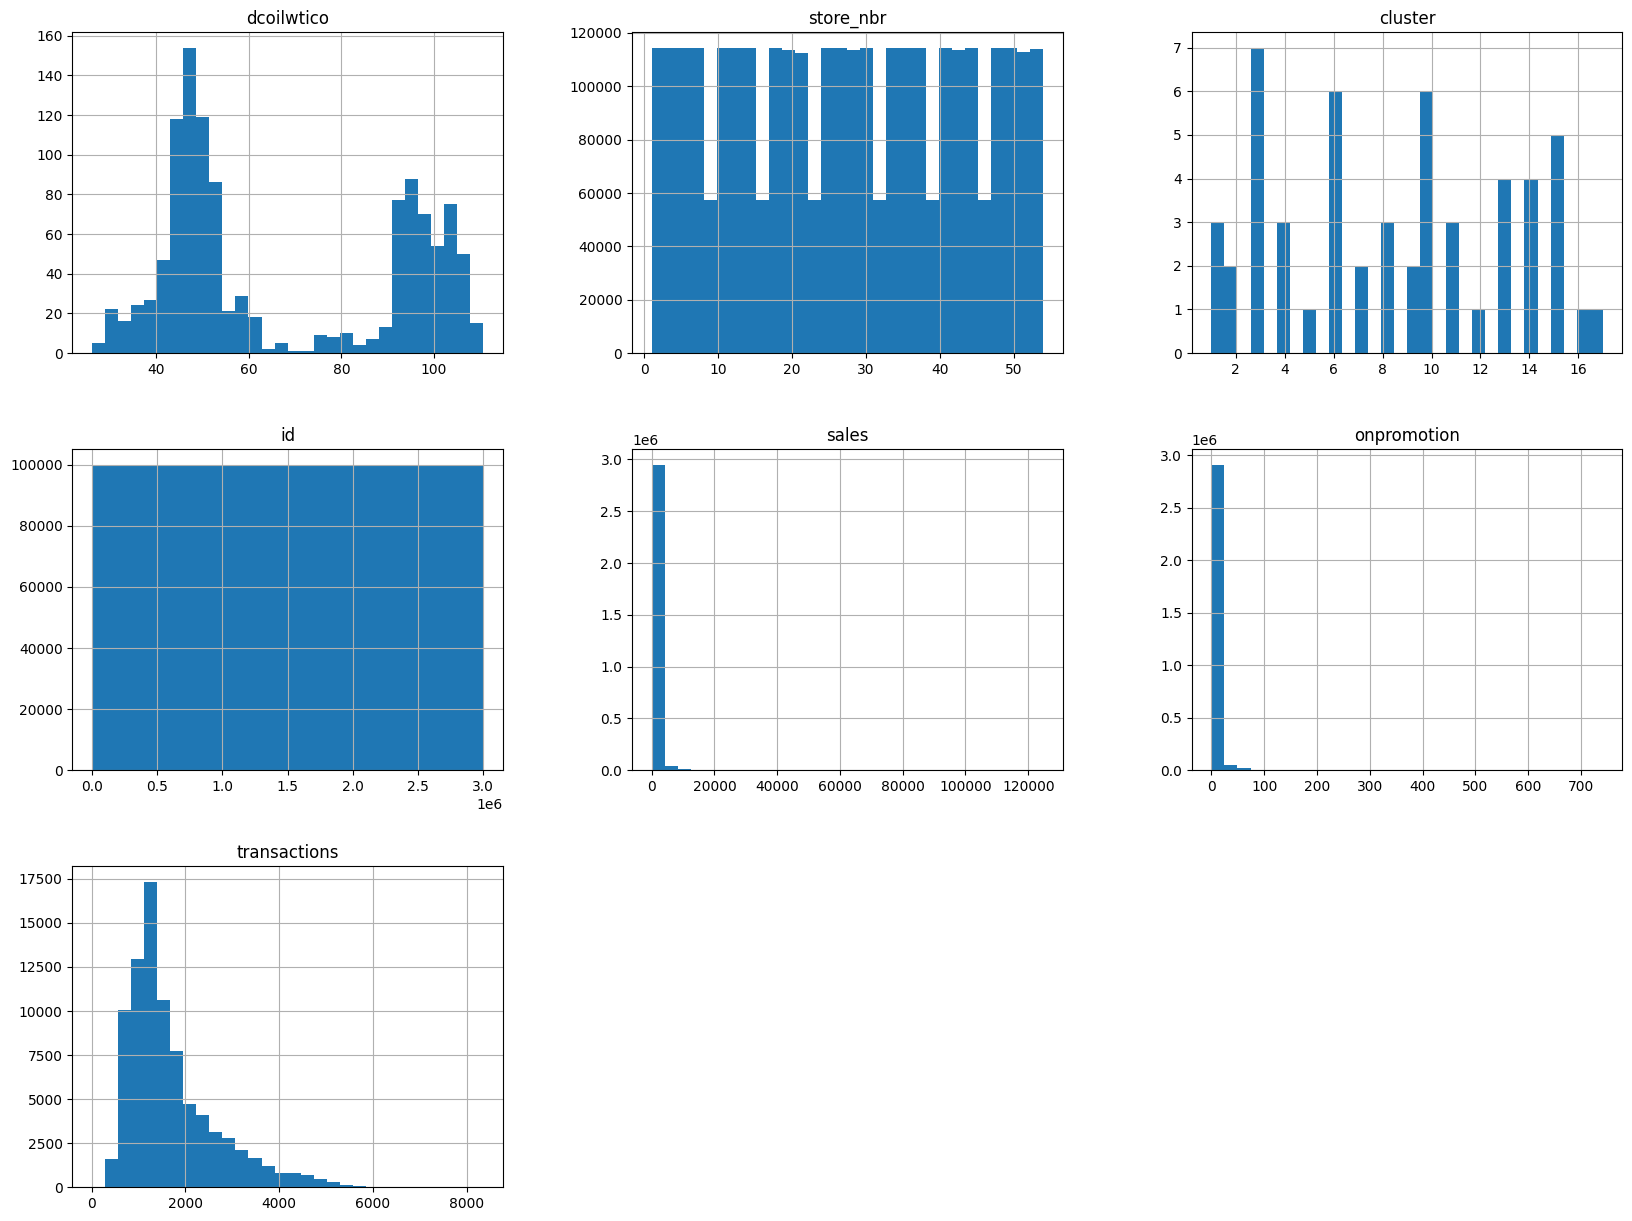

In [ ]:
# Plotting histograms on the columns

train_data.hist(bins=30, figsize=(20,15))

## Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

`Drop Duplicates`

`Impute Missing Values`

## Answering Hypothesis Questions

## Answering Business Questions

`Dataset Splitting`

`New Features Creation`

`Features Encoding`

In [ ]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

`Features Scaling`


In [ ]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.

## Optional: Train set Balancing (for Classification only)

## Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

### Train the Model

### Evaluate the Model on the Evaluation dataset (Evalset)

### Predict on a unknown dataset (Testset)

## Simple Model #002

### Create the Model

### Train the Model

### Evaluate the Model on the Evaluation dataset (Evalset)

### Predict on a unknown dataset (Testset)

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.